In [37]:
import networkx as nx
import matplotlib.pyplot as plt
# import networkx.algorithms.community as nx_comm
import community as community_louvain
from community import partition_at_level

from collections import defaultdict

In [2]:
fig_size = (4, 4)

# Loading plot

Karate Club is a popular dataset in the field of social network analysis.

It consists of 34 vertices and 78 edges that represent interactions between members of the karate club in the USA. 

In [3]:
G = nx.karate_club_graph()

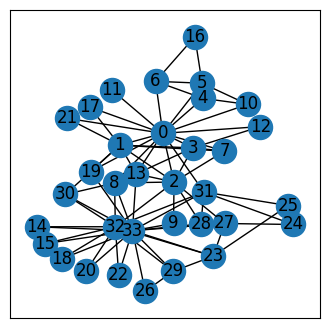

In [4]:
fig = plt.figure(figsize=fig_size)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos);

# Detecting communities

In [111]:
clusters=community_louvain.community_louvain.best_partition(G, random_state=42)
# clusters = nx.community.girvan_newman(G)
print(clusters)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 2, 6: 2, 7: 0, 8: 3, 9: 3, 10: 2, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 2, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 3, 24: 1, 25: 1, 26: 3, 27: 3, 28: 1, 29: 3, 30: 3, 31: 1, 32: 3, 33: 3}


In [115]:
communities = defaultdict(list)
for key, val in sorted(clusters.items()):
    communities[val].append(key)
    
nodes_per_community = list(communities.values())

In [108]:
# nodes_per_community = list(map(list, clusters))

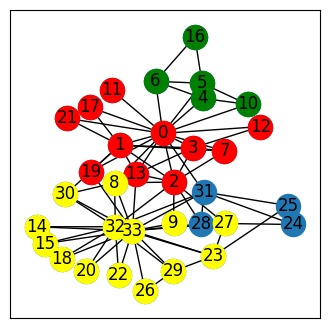

In [117]:
fig = plt.figure(figsize=fig_size)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[0], node_color='red')
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[1], node_color='green')
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[2], node_color='yellow')
nx.draw_networkx_edges(G, pos=pos);

# Validating

The **coverage** of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.

The **performance** of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.

In [118]:
coverage, performance = nx.community.partition_quality(G, nodes_per_community)
coverage, performance

(0.7564102564102564, 0.7825311942959001)

**Modularity** (Q) is a measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities). 

Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.

Source: https://en.wikipedia.org/wiki/Modularity_(networks)

In [119]:
Q = nx.community.modularity(G, nodes_per_community)
Q

0.4151051939513477

Modulatiry (Q) greater than 0.3-0.7 means significant community structure.

# Ego plot for each community

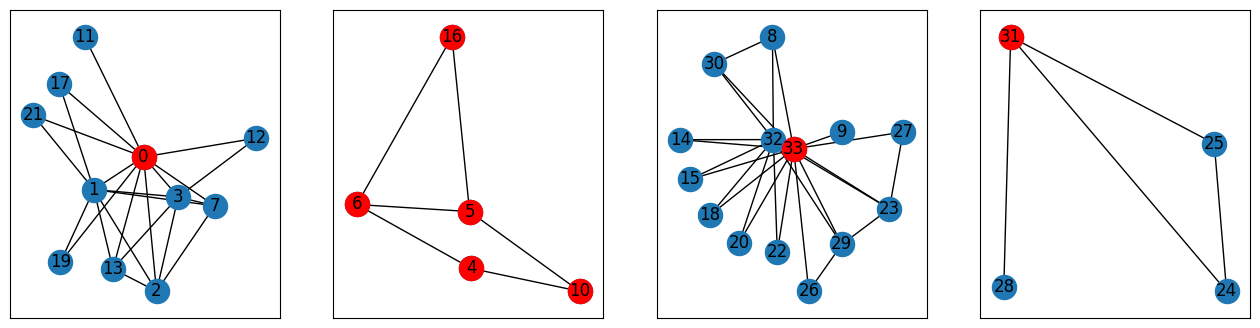

In [121]:
fig, axis = plt.subplots(figsize=(4 * len(nodes_per_community), 4), nrows=1, ncols=len(nodes_per_community))
for comm_id, nodes in enumerate(nodes_per_community):
    
    S = G.subgraph(nodes)
    center_nodes = nx.center(S)


    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_labels(S,pos=pos, ax=axis[comm_id])
    nx.draw_networkx_nodes(S, pos=pos, ax=axis[comm_id])
    nx.draw_networkx_nodes(S, pos=pos, nodelist=center_nodes, node_color='red', ax=axis[comm_id])
    nx.draw_networkx_edges(S, pos=pos, ax=axis[comm_id]);